In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class CalibrationPosesGenerator:
    def __init__(self, N_cycle, N_pose_per_cycle, max_distance):
        self.N_cycle = N_cycle
        self.N_pose_per_cycle = N_pose_per_cycle
        self.max_distance = max_distance
        self.calibration_poses = []

    def generate_calibration_poses(self):
        for i in range(self.N_cycle):
            distance = (i+1) * self.max_distance / self.N_cycle
            for j in range(self.N_pose_per_cycle):
                pose_ratio = (j+1) / self.N_pose_per_cycle  # Linearly interpolate between poses

                # Calculate the position along the linear path in x, y, and limited z
                position_x = pose_ratio * distance
                position_y = pose_ratio * distance
                position_z = min(pose_ratio * distance, 0.1)  # Limit z-axis motion to 100 mm (0.1 meters)

                # Create a transformation matrix representing the pose
                transformation_matrix = np.eye(4)
                transformation_matrix[:3, 3] = [position_x, position_y, position_z]
                self.calibration_poses.append(transformation_matrix)

        return self.calibration_poses

In [3]:
N_cycle = 5  # Number of cycles
N_pose_per_cycle = 10  # Number of poses per cycle
max_distance = 1.0  # Maximum distance of linear motion
generator = CalibrationPosesGenerator(N_cycle, N_pose_per_cycle, max_distance)
calibration_poses = generator.generate_calibration_poses()


In [4]:
x_coords = [pose[0, 3] for pose in calibration_poses]
y_coords = [pose[1, 3] for pose in calibration_poses]
z_coords = [pose[2, 3] for pose in calibration_poses]

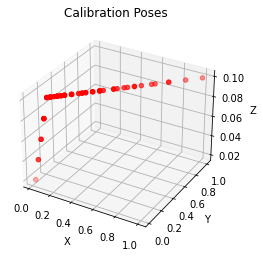

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Calibration Poses')
plt.show()

In [24]:
class CalibrationPosesGenerator:
    def __init__(self, length, width, max_z, step_z):
        self.length = length
        self.width = width
        self.max_z = max_z
        self.step_z = step_z
        self.calibration_poses = []

    def generate_calibration_poses(self):
        x_values = np.linspace(-100, 100, num=3)  # Change num to increase the number of poses in x-axis
        y_values = np.linspace(-50, 50, num=3)    # Change num to increase the number of poses in y-axis

        for z in np.arange(0, self.max_z, self.step_z):
            for x in x_values:
                for y in y_values:
                    transformation_matrix = np.eye(4)
                    transformation_matrix[:3, 3] = [x, y, min(z, self.max_z)]
                    self.calibration_poses.append(transformation_matrix)

        return self.calibration_poses

In [20]:
length = 200  # Length of the rectangular in x-direction
width = 100  # Width of the rectangular in y-direction
max_z = 100  # Maximum limit in z-direction
step_z = 10  # Incremental step in z-direction

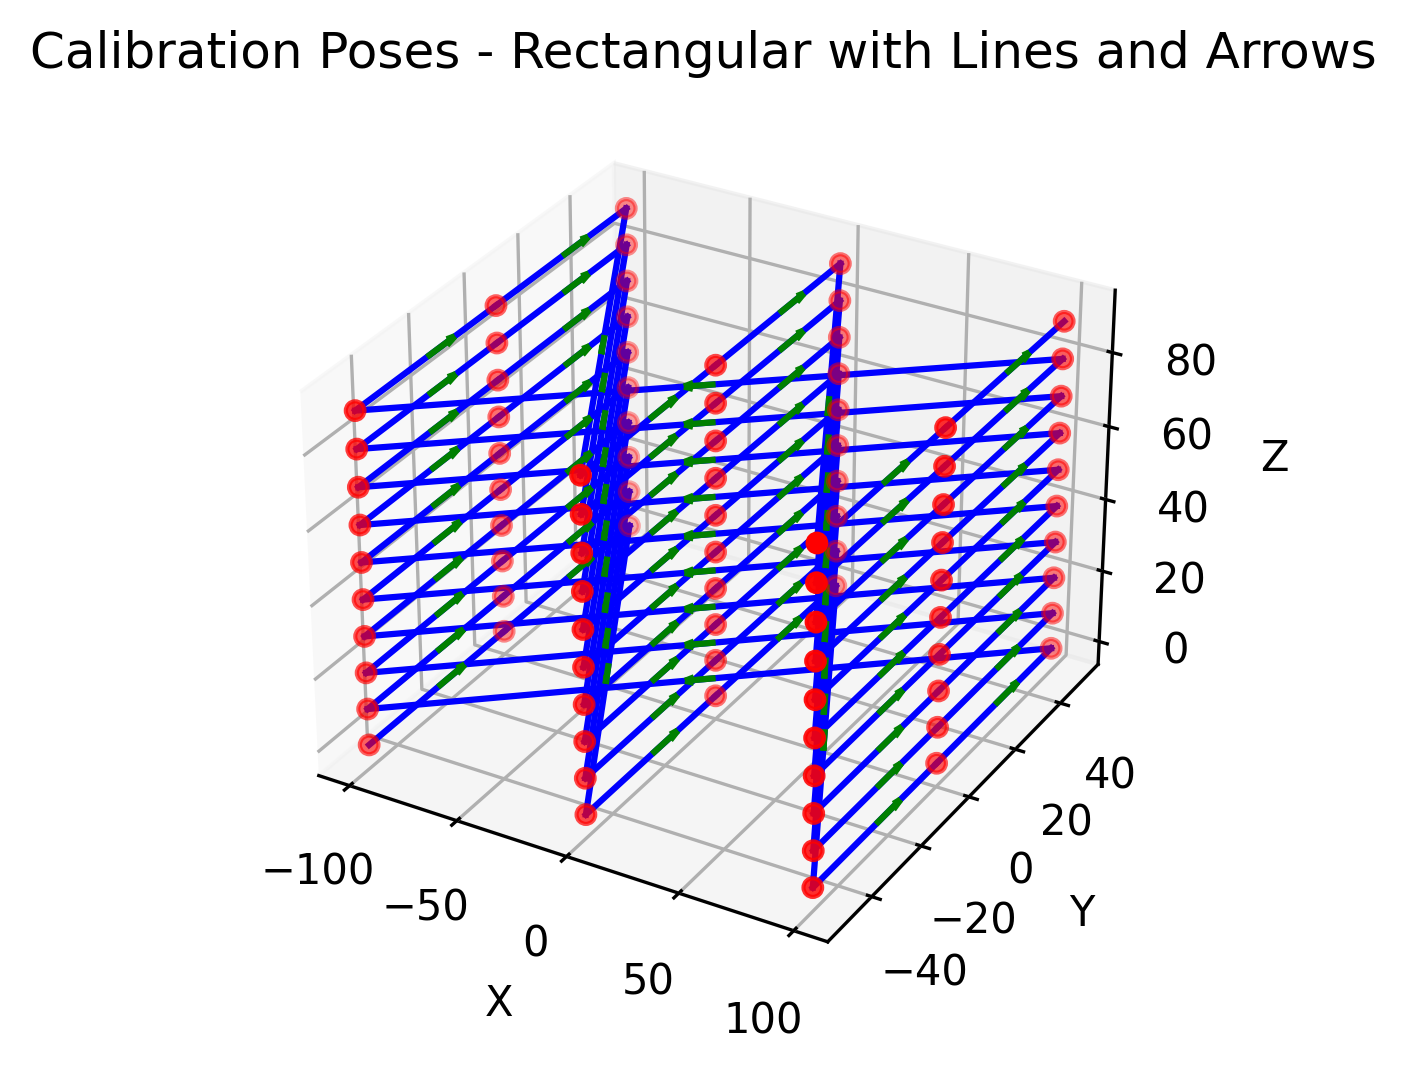

In [25]:
generator = CalibrationPosesGenerator(length, width, max_z, step_z)
calibration_poses = generator.generate_calibration_poses()

# Extract x, y, z coordinates from calibration poses
x_coords = [pose[0, 3] for pose in calibration_poses]
y_coords = [pose[1, 3] for pose in calibration_poses]
z_coords = [pose[2, 3] for pose in calibration_poses]

# Plot
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, c='r', marker='o')

# Plot lines
for i in range(len(calibration_poses) - 1):
    ax.plot([x_coords[i], x_coords[i+1]], [y_coords[i], y_coords[i+1]], [z_coords[i], z_coords[i+1]], c='b')

# Plot arrows
for i in range(len(calibration_poses) - 1):
    midpoint = [(x_coords[i] + x_coords[i+1]) / 2,
                (y_coords[i] + y_coords[i+1]) / 2,
                (z_coords[i] + z_coords[i+1]) / 2]
    dx = x_coords[i+1] - x_coords[i]
    dy = y_coords[i+1] - y_coords[i]
    dz = z_coords[i+1] - z_coords[i]
    ax.quiver(midpoint[0], midpoint[1], midpoint[2], dx, dy, dz, length=10, normalize=True, color='g')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Calibration Poses - Rectangular with Lines and Arrows')
plt.show()